<a href="https://colab.research.google.com/github/dongminkim0220/pytorch_tutorial/blob/master/RNN_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN, LSTM, GRU

PyTorch RNN Tutorial - Name Classification Using A Recurrent Neural Net

https://www.youtube.com/watch?v=WEV61GmmPrk&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=19

PyTorch Tutorial - RNN & LSTM & GRU - Recurrent Neural Nets

https://www.youtube.com/watch?v=0_PgWWmauHk&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=20

In [10]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [11]:
!pwd

/content


In [12]:
%cd drive/MyDrive/pytorch\ intro

/content/drive/MyDrive/pytorch intro


In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from utils import ALL_LETTERS, N_LETTERS
from utils import load_data, letter_to_tensor, line_to_tensor, random_training_example

## RNN from scratch

In [15]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim = 1)
    
    def forward(self, input_tensor, hidden_tensor):
        combined = torch.cat((input_tensor, hidden_tensor), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

In [27]:
category_lines, all_categories = load_data()

In [28]:
n_categories = len(category_lines)

In [29]:
n_categories, all_categories

(18,
 ['Polish',
  'Italian',
  'Arabic',
  'Irish',
  'Czech',
  'Dutch',
  'French',
  'Scottish',
  'Japanese',
  'English',
  'Korean',
  'Russian',
  'German',
  'Greek',
  'Spanish',
  'Vietnamese',
  'Chinese',
  'Portuguese'])

Try some examples

In [30]:
n_hidden = 128
rnn = RNN(N_LETTERS, n_hidden, n_categories)

In [31]:
input_tensor = letter_to_tensor("A")
hidden_tensor = rnn.init_hidden()
output, next_hidden = rnn(input_tensor, hidden_tensor)

In [33]:
output.size()

torch.Size([1, 18])

In [34]:
next_hidden.size()

torch.Size([1, 128])

In [36]:
input_tensor = line_to_tensor("Albert")
hidden_tensor = rnn.init_hidden()
output, next_hidden = rnn(input_tensor[0], hidden_tensor)

In [37]:
output.size()

torch.Size([1, 18])

In [38]:
next_hidden.size()

torch.Size([1, 128])

Helper function

In [39]:
def category_from_output(output):
    category_idx = torch.argmax(output).item()
    return all_categories[category_idx]

In [40]:
category_from_output(output)

'Czech'

train

In [41]:
criterion = nn.NLLLoss()
learning_rate = 0.005
optimizer = torch.optim.SGD(rnn.parameters(), lr = learning_rate)

In [42]:
def train(line_tensor, category_tensor):
    hidden = rnn.init_hidden()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return output, loss

In [43]:
current_loss = 0
all_losses = []
plot_steps, print_steps = 1000, 5000
n_iters = 100000

In [45]:
for i in range(n_iters):
    category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)
    output, loss = train(line_tensor, category_tensor)
    current_loss += loss

    if (i+1) % plot_steps == 0:
        all_losses.append(current_loss / plot_steps)
        current_loss = 0
    
    if (i+1) % print_steps == 0:
        guess = category_from_output(output)
        correct = "CORRECT" if guess == category else f"WRONG {category}"
        print(f"{i} {i/n_iters * 100} {loss:.4f} {line} / {guess} {correct}")

4999 4.999 3.1483 Sorg / Chinese WRONG German
9999 9.998999999999999 2.3989 Semick / English WRONG Czech
14999 14.999 1.2251 Imada / Japanese CORRECT
19999 19.999 2.6165 Simoes / Dutch WRONG Portuguese
24999 24.999 1.4845 Aritza / Portuguese WRONG Spanish
29999 29.999 4.2993 Genji / Korean WRONG Japanese
34999 34.999 1.1959 Huber / German CORRECT
39999 39.999 1.3435 Pavlik / Czech CORRECT
44999 44.999 1.0607 Moreno / Portuguese CORRECT
49999 49.999 1.1385 Ha / Vietnamese WRONG Korean
54999 54.998999999999995 2.9747 Trampota / Italian WRONG Czech
59999 59.999 0.1163 Fukushima / Japanese CORRECT
64999 64.999 3.3233 Clark / Polish WRONG Irish
69999 69.999 1.2617 Maloof / Arabic CORRECT
74999 74.99900000000001 0.2803 Quan / Chinese CORRECT
79999 79.999 0.5862 Madeira / Portuguese CORRECT
84999 84.999 0.9005 Chu / Vietnamese CORRECT
89999 89.999 1.5867 Araujo / Portuguese WRONG Spanish
94999 94.999 1.2737 Seeger / German WRONG Dutch
99999 99.99900000000001 0.9562 Han / Chinese WRONG Vietnam

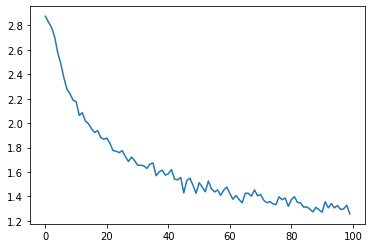

In [46]:
plt.figure()
plt.plot(all_losses)
plt.show()

In [47]:
def predict(input_line):
    print(f"\n> {input_line}")
    with torch.no_grad():
        line_tensor = line_to_tensor(input_line)
        hidden = rnn.init_hidden()

        for i in range(line_tensor.size()[0]):
            output, hidden = rnn(line_tensor[i], hidden)
        
        guess = category_from_output(output)
        print(guess)

In [50]:
while True:
    sentence = input("input: ")
    if sentence == "quit":
        break
    
    predict(sentence)

input: adler

> adler
French
input: acker

> acker
German
input: abaimov

> abaimov
Russian
input: bao

> bao
Spanish
input: bai

> bai
Polish
input: quit
